# Task
The purpose of this code to assemble data for each sample analysed via GCMS by Jay on 2019-09-13

# Files Used:
1. "2019-09-13 Preliminary Inverted Flame Diesel and Cookstove Results.xlsx" <br> in "GCMS_EEM_ToxicityAnalysis Paper/GCMS Data"
2. "Sample Temperature Data.xlsx" <br> in "GCMS_EEM_ToxicityAnalysis Paper/Sample Extraction_Dilution Data - GCMS Sept 2019"

In [2]:
import pandas as pd
def load_excel(filepath):
    "Returns excel file as pandas dataframe"
    return pd.read_excel(filepath)

In [3]:
gcms_filepath =  '2019-09-13 Preliminary Inverted Flame Diesel and Cookstove Results.xlsx'
samples_data_filepath = '../Sample Extraction_Dilution Data - GCMS Sept 2019/Sample Temperature Data.xlsx'

gcms_pd = load_excel(gcms_filepath)
samples_data_pd = load_excel(samples_data_filepath)

In [4]:
samples_data_pd

,Sample ID,Fuel,Dil,Tmax,Type,Notes,Soot Mass (µg),Cyclohexane mass for dilution (g),Final Concentration for GCMS Analysis (µg/mL),Final Concentration for EEM Analysis (µg/mL)
0,EEF-198,Diesel,NaN,NaN,Blank,Filter Type: Blank,28.500,0.781000,28.427017,28.430000
1,EEF-199,Diesel,NaN,NaN,Sample,-,474.750,1.556000,237.680109,20.060000
2,EEF-200,Diesel,NaN,NaN,Sample,-,443.250,1.562000,221.057458,20.250000
3,EEF-201,Diesel,NaN,NaN,Sample,-,425.250,1.555000,213.035209,20.030000
4,EEF-212,Woodsmoke,NaN,NaN,Blank,Filter Type: Blank,5.500,0.780000,5.492949,5.490000
5,EEF-213,Woodsmoke,NaN,NaN,Forced Draft,Cookstove Setting: Air,67.250,0.784000,66.821110,16.330000
6,EEF-214,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,138.250,1.169000,92.127246,3.450000
7,EEF-215,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,352.000,1.562000,175.549296,4.040000
8,EEF-216,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,407.750,1.557000,204.005941,4.030000
9,LB-HL4-01,Woodsmoke,NaN,NaN,Forced Draft,Cookstove Setting: Air,182.583,0.781000,182.115438,19.340000


In [5]:
# Left Join GCMS data on samples data 
gcms_merged_data_pd = samples_data_pd.join(gcms_pd.set_index('Sample'),
                 on='Sample ID', 
                 how='left')

In [6]:
gcms_merged_data_pd.columns[12:]

Index(['Naphthalene Results', 'Acenaphthylene Results', 'Acenaphthene Results',
       'Fluorene Results', 'Phenanthrene Results', 'Anthracene Results',
       'Fluoranthene Results', 'Pyrene Results',
       'Cyclopenta[c,d]pyrene Results', 'Benzo[a]anthracene Results',
       'Chrysene Results', '5-Methylchrysene Results',
       'Benzofluoranthenes Results', 'Benzo[j]fluoranthene Results',
       'Benzo[k]fluoranthene Results', 'Benzo[a]pyrene Results',
       'Indeno[1,2,3-cd]pyrene Results', 'Dibenzo[a,h]anthracene Results',
       'Benzo[g,h,i]perylene Results', 'Dibenzo[a,l]pyrene Results',
       'Coronene Results', 'Dibenzo[a,e]pyrene Results',
       'Dibenzo[a,i]pyrene Results', 'Dibenzo[a,h]pyrene Results'],
      dtype='object')

In [7]:
# Fill Nan values with 0
gcms_merged_data_pd.fillna(0)

# Select first 6 columns and fix normalization column
normalized_gcms_pd = gcms_merged_data_pd[gcms_merged_data_pd.columns[:9]]
normalization_col = 'Final Concentration for GCMS Analysis (µg/mL)'

# For each PAH, divide value (ng/mL) by extract concentration (ug/mL) to get (ng PAH/ug soot)
for col in gcms_merged_data_pd.columns[12:]:
    col_new = col[0:len(col)-8] + ' (ng PAH/ug soot)'
    normalized_gcms_pd[col_new] = gcms_merged_data_pd[col]/gcms_merged_data_pd[normalization_col]

C:\Users\IVN\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [8]:
gcms_merged_data_pd

,Sample ID,Fuel,Dil,Tmax,Type,Notes,Soot Mass (µg),Cyclohexane mass for dilution (g),Final Concentration for GCMS Analysis (µg/mL),Final Concentration for EEM Analysis (µg/mL),...,Benzo[k]fluoranthene Results,Benzo[a]pyrene Results,"Indeno[1,2,3-cd]pyrene Results","Dibenzo[a,h]anthracene Results","Benzo[g,h,i]perylene Results","Dibenzo[a,l]pyrene Results",Coronene Results,"Dibenzo[a,e]pyrene Results","Dibenzo[a,i]pyrene Results","Dibenzo[a,h]pyrene Results"
0,EEF-198,Diesel,NaN,NaN,Blank,Filter Type: Blank,28.500,0.781000,28.427017,28.430000,...,0.256187,0.61294,0.444946,0.318479,0.300668,0,0.0643775,0.066418,0.0529769,1.22229
1,EEF-199,Diesel,NaN,NaN,Sample,-,474.750,1.556000,237.680109,20.060000,...,0.272752,0.707578,0.391876,0.325788,0.300764,0,0.0365221,0.0481776,0.0418261,1.38709
2,EEF-200,Diesel,NaN,NaN,Sample,-,443.250,1.562000,221.057458,20.250000,...,0.241633,0.656399,0.335601,0.287523,0.27726,0,0.0177415,0.0223267,0,1.25016
3,EEF-201,Diesel,NaN,NaN,Sample,-,425.250,1.555000,213.035209,20.030000,...,0.228467,0.61631,0.312906,0.298567,0.248585,0,0.0268846,0.027935,0,1.11898
4,EEF-212,Woodsmoke,NaN,NaN,Blank,Filter Type: Blank,5.500,0.780000,5.492949,5.490000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,EEF-213,Woodsmoke,NaN,NaN,Forced Draft,Cookstove Setting: Air,67.250,0.784000,66.821110,16.330000,...,1.0715,13.3401,11.6834,1.4872,16.5796,6.1582,1.85947,0.362582,0.841982,1.39368
6,EEF-214,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,138.250,1.169000,92.127246,3.450000,...,35.6268,173.662,131.986,18.5016,141.351,44.0249,17.608,3.10066,24.8936,6.45444
7,EEF-215,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,352.000,1.562000,175.549296,4.040000,...,46.3491,256.996,187.98,28.3569,198.801,55.7632,21.644,3.90758,31.8987,11.8493
8,EEF-216,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,407.750,1.557000,204.005941,4.030000,...,57.6226,295.733,227.087,34.1648,246.819,66.2194,27.66,6.34677,29.9519,13.1346
9,LB-HL4-01,Woodsmoke,NaN,NaN,Forced Draft,Cookstove Setting: Air,182.583,0.781000,182.115438,19.340000,...,2.72011,29.3254,26.3096,4.13616,37.4684,5.98845,3.26349,0.585843,2.66032,1.55262


In [9]:
normalized_gcms_pd

,Sample ID,Fuel,Dil,Tmax,Type,Notes,Soot Mass (µg),Cyclohexane mass for dilution (g),Final Concentration for GCMS Analysis (µg/mL),Naphthalene (ng PAH/ug soot),...,Benzo[k]fluoranthene (ng PAH/ug soot),Benzo[a]pyrene (ng PAH/ug soot),"Indeno[1,2,3-cd]pyrene (ng PAH/ug soot)","Dibenzo[a,h]anthracene (ng PAH/ug soot)","Benzo[g,h,i]perylene (ng PAH/ug soot)","Dibenzo[a,l]pyrene (ng PAH/ug soot)",Coronene (ng PAH/ug soot),"Dibenzo[a,e]pyrene (ng PAH/ug soot)","Dibenzo[a,i]pyrene (ng PAH/ug soot)","Dibenzo[a,h]pyrene (ng PAH/ug soot)"
0,EEF-198,Diesel,NaN,NaN,Blank,Filter Type: Blank,28.500,0.781000,28.427017,0.0122142,...,0.00901211,0.0215619,0.0156522,0.0112034,0.0105768,0,0.00226466,0.00233644,0.00186361,0.0429973
1,EEF-199,Diesel,NaN,NaN,Sample,-,474.750,1.556000,237.680109,0.00238965,...,0.00114756,0.00297702,0.00164875,0.0013707,0.00126541,0,0.000153661,0.000202699,0.000175977,0.00583595
2,EEF-200,Diesel,NaN,NaN,Sample,-,443.250,1.562000,221.057458,0.00172675,...,0.00109308,0.00296936,0.00151816,0.00130067,0.00125424,0,8.02572e-05,0.000101,0,0.00565535
3,EEF-201,Diesel,NaN,NaN,Sample,-,425.250,1.555000,213.035209,0.00187125,...,0.00107244,0.002893,0.0014688,0.00140149,0.00116688,0,0.000126198,0.000131129,0,0.00525257
4,EEF-212,Woodsmoke,NaN,NaN,Blank,Filter Type: Blank,5.500,0.780000,5.492949,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,EEF-213,Woodsmoke,NaN,NaN,Forced Draft,Cookstove Setting: Air,67.250,0.784000,66.821110,0.00354993,...,0.0160354,0.199638,0.174846,0.0222564,0.24812,0.0921596,0.0278276,0.00542616,0.0126005,0.0208569
6,EEF-214,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,138.250,1.169000,92.127246,0.0167407,...,0.386712,1.88502,1.43265,0.200827,1.5343,0.47787,0.191127,0.0336563,0.270209,0.0700601
7,EEF-215,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,352.000,1.562000,175.549296,0.00676259,...,0.264023,1.46395,1.07081,0.161533,1.13245,0.31765,0.123293,0.0222592,0.181708,0.0674984
8,EEF-216,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,407.750,1.557000,204.005941,0.0067708,...,0.282455,1.44963,1.11314,0.167469,1.20986,0.324596,0.135584,0.0311107,0.146819,0.0643833
9,LB-HL4-01,Woodsmoke,NaN,NaN,Forced Draft,Cookstove Setting: Air,182.583,0.781000,182.115438,0.00125172,...,0.0149362,0.161027,0.144467,0.0227118,0.20574,0.0328827,0.0179199,0.00321688,0.0146079,0.00852548


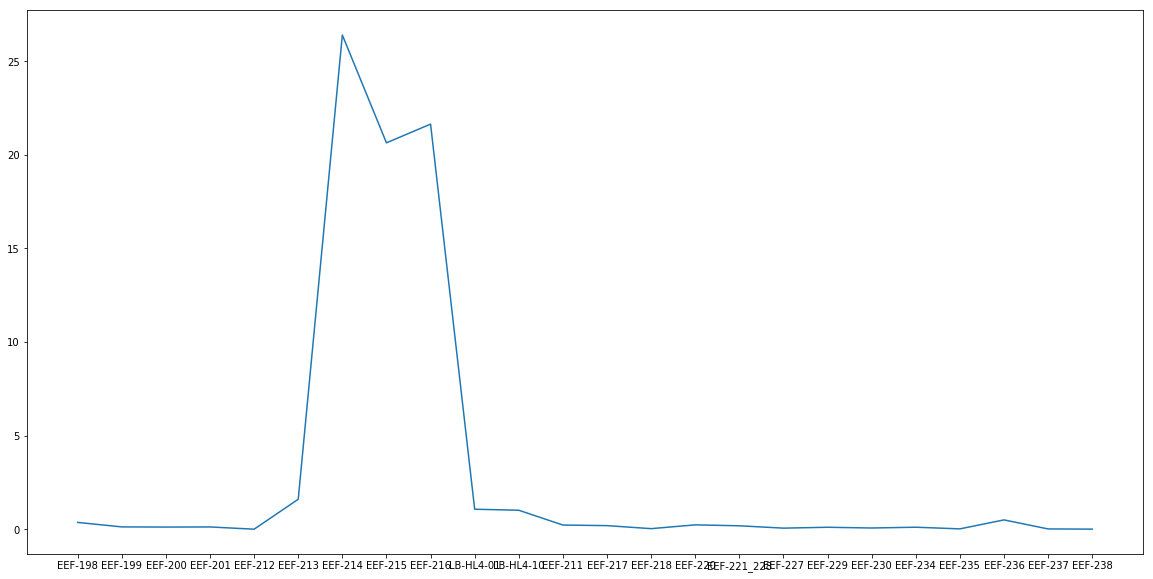

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(normalized_gcms_pd['Sample ID'],normalized_gcms_pd[normalized_gcms_pd.columns[9:]].sum(axis=1))
# plt.ylim([0,5])

In [11]:
normalized_gcms_pd[normalized_gcms_pd.columns[9:]].sum(axis=1)

0      0.361335
1      0.121817
2      0.113467
3      0.118705
4      0.000000
5      1.597905
6     26.399203
7     20.639054
8     21.639101
9      1.067000
10     1.011823
11     0.220907
12     0.190144
13     0.028633
14     0.231027
15     0.181485
16     0.055955
17     0.103024
18     0.063127
19     0.105353
20     0.016526
21     0.495861
22     0.013105
23     0.003155
dtype: float64

In [12]:
# Deleting and Grouping PAHs
gcms_merged_data_pd = gcms_merged_data_pd.drop(columns=['Acenaphthene Results', \
                                                      '5-Methylchrysene Results', \
                                                      'Dibenzo[a,h]anthracene Results', \
                                                      'Benzo[j]fluoranthene Results', \
                                                      'Benzo[k]fluoranthene Results'])

gcms_merged_data_pd['Dibenzopyrenes Results'] = gcms_merged_data_pd[['Dibenzo[a,l]pyrene Results', \
                                                                            'Dibenzo[a,e]pyrene Results', \
                                                                            'Dibenzo[a,i]pyrene Results', \
                                                                            'Dibenzo[a,h]pyrene Results']] \
                                                                            .sum(axis=1)

gcms_merged_data_pd = gcms_merged_data_pd.drop(columns=['Dibenzo[a,l]pyrene Results', \
                                                      'Dibenzo[a,e]pyrene Results', \
                                                      'Dibenzo[a,i]pyrene Results', \
                                                      'Dibenzo[a,h]pyrene Results'])


In [13]:
# Deleting and Grouping PAHs
normalized_gcms_pd = normalized_gcms_pd.drop(columns=['Acenaphthene (ng PAH/ug soot)', \
                                                      '5-Methylchrysene (ng PAH/ug soot)', \
                                                      'Dibenzo[a,h]anthracene (ng PAH/ug soot)', \
                                                      'Benzo[j]fluoranthene (ng PAH/ug soot)', \
                                                      'Benzo[k]fluoranthene (ng PAH/ug soot)'])

normalized_gcms_pd['Dibenzopyrenes (ng PAH/ug soot)'] = normalized_gcms_pd[['Dibenzo[a,l]pyrene (ng PAH/ug soot)', \
                                                                            'Dibenzo[a,e]pyrene (ng PAH/ug soot)', \
                                                                            'Dibenzo[a,i]pyrene (ng PAH/ug soot)', \
                                                                            'Dibenzo[a,h]pyrene (ng PAH/ug soot)']] \
                                                                            .sum(axis=1)

normalized_gcms_pd = normalized_gcms_pd.drop(columns=['Dibenzo[a,l]pyrene (ng PAH/ug soot)', \
                                                      'Dibenzo[a,e]pyrene (ng PAH/ug soot)', \
                                                      'Dibenzo[a,i]pyrene (ng PAH/ug soot)', \
                                                      'Dibenzo[a,h]pyrene (ng PAH/ug soot)'])


In [14]:
gcms_merged_data_pd.columns

Index(['Sample ID', 'Fuel ', 'Dil', 'Tmax', 'Type', 'Notes', 'Soot Mass (µg)',
       'Cyclohexane mass for dilution (g)',
       'Final Concentration for GCMS Analysis (µg/mL)',
       'Final Concentration for EEM Analysis (µg/mL)', 'Unnamed: 1',
       'Unnamed: 2', 'Naphthalene Results', 'Acenaphthylene Results',
       'Fluorene Results', 'Phenanthrene Results', 'Anthracene Results',
       'Fluoranthene Results', 'Pyrene Results',
       'Cyclopenta[c,d]pyrene Results', 'Benzo[a]anthracene Results',
       'Chrysene Results', 'Benzofluoranthenes Results',
       'Benzo[a]pyrene Results', 'Indeno[1,2,3-cd]pyrene Results',
       'Benzo[g,h,i]perylene Results', 'Coronene Results',
       'Dibenzopyrenes Results'],
      dtype='object')

In [15]:
normalized_gcms_pd

,Sample ID,Fuel,Dil,Tmax,Type,Notes,Soot Mass (µg),Cyclohexane mass for dilution (g),Final Concentration for GCMS Analysis (µg/mL),Naphthalene (ng PAH/ug soot),...,Pyrene (ng PAH/ug soot),"Cyclopenta[c,d]pyrene (ng PAH/ug soot)",Benzo[a]anthracene (ng PAH/ug soot),Chrysene (ng PAH/ug soot),Benzofluoranthenes (ng PAH/ug soot),Benzo[a]pyrene (ng PAH/ug soot),"Indeno[1,2,3-cd]pyrene (ng PAH/ug soot)","Benzo[g,h,i]perylene (ng PAH/ug soot)",Coronene (ng PAH/ug soot),Dibenzopyrenes (ng PAH/ug soot)
0,EEF-198,Diesel,NaN,NaN,Blank,Filter Type: Blank,28.500,0.781000,28.427017,0.0122142,...,0.0143942,0,0.0057813,0.00704948,0.0535552,0.0215619,0.0156522,0.0105768,0.00226466,0.047197
1,EEF-199,Diesel,NaN,NaN,Sample,-,474.750,1.556000,237.680109,0.00238965,...,0.0407165,0.00647695,0.00234735,0.00288435,0.00653388,0.00297702,0.00164875,0.00126541,0.000153661,0.006215
2,EEF-200,Diesel,NaN,NaN,Sample,-,443.250,1.562000,221.057458,0.00172675,...,0.037983,0.00647725,0.00224035,0.00217548,0.00650244,0.00296936,0.00151816,0.00125424,8.02572e-05,0.005756
3,EEF-201,Diesel,NaN,NaN,Sample,-,425.250,1.555000,213.035209,0.00187125,...,0.0389611,0.00666838,0.00180963,0.00256071,0.00657399,0.002893,0.0014688,0.00116688,0.000126198,0.005384
4,EEF-212,Woodsmoke,NaN,NaN,Blank,Filter Type: Blank,5.500,0.780000,5.492949,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
5,EEF-213,Woodsmoke,NaN,NaN,Forced Draft,Cookstove Setting: Air,67.250,0.784000,66.821110,0.00354993,...,0.019039,0.118919,0.0541544,0.0732903,0.397334,0.199638,0.174846,0.24812,0.0278276,0.131043
6,EEF-214,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,138.250,1.169000,92.127246,0.0167407,...,2.96767,6.67045,1.55192,1.74185,3.50606,1.88502,1.43265,1.5343,0.191127,0.851795
7,EEF-215,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,352.000,1.562000,175.549296,0.00676259,...,2.54022,5.10643,1.17124,1.32196,2.69303,1.46395,1.07081,1.13245,0.123293,0.589115
8,EEF-216,Woodsmoke,NaN,NaN,Natural Draft,Cookstove Setting: Natural Draft,407.750,1.557000,204.005941,0.0067708,...,2.69973,5.4747,1.23387,1.34697,2.75683,1.44963,1.11314,1.20986,0.135584,0.566908
9,LB-HL4-01,Woodsmoke,NaN,NaN,Forced Draft,Cookstove Setting: Air,182.583,0.781000,182.115438,0.00125172,...,0.00503131,0.055864,0.0215241,0.0332082,0.277348,0.161027,0.144467,0.20574,0.0179199,0.059233


In [16]:
# Exporting GCMS Data
gcms_merged_data_pd.iloc[1:4,[0,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].to_csv('GCMS_diesel_ngmL.csv')
gcms_merged_data_pd.iloc[5:11,[0,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]].to_csv('GCMS_woodsmoke_ngmL.csv')

In [17]:
import numpy as np
y_diesel = normalized_gcms_pd.iloc[1:4,9:]
diesel_labels = normalized_gcms_pd.iloc[1:4,1]

y_woodsmoke = normalized_gcms_pd.iloc[[5,9,10,6,7,8],9:]
woodsmoke_labels = normalized_gcms_pd.iloc[[5,9,10,6,7,8],4]

y_ws_d = normalized_gcms_pd.iloc[[1,2,3,5,9,10,6,7,8],9:]

y_ethane_amb = normalized_gcms_pd.iloc[[11,12,13,14,15,17,18,22],9:]
ethane_labels_amb = normalized_gcms_pd.iloc[[11,12,13,14,15,17,18,22],2]

y_ethane_ph = normalized_gcms_pd.iloc[[16,20,21],9:]
ethane_labels_ph = normalized_gcms_pd.iloc[[16,20,21],2]

y_ethylene = normalized_gcms_pd.iloc[[19,23],9:]
ethylene_labels = normalized_gcms_pd.iloc[[19,23],1]

In [18]:
# Exporting GCMS Data
normalized_gcms_pd.iloc[1:4,[0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]].to_csv('GCMS_diesel.csv')
normalized_gcms_pd.iloc[5:11,[0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]].to_csv('GCMS_woodsmoke.csv')

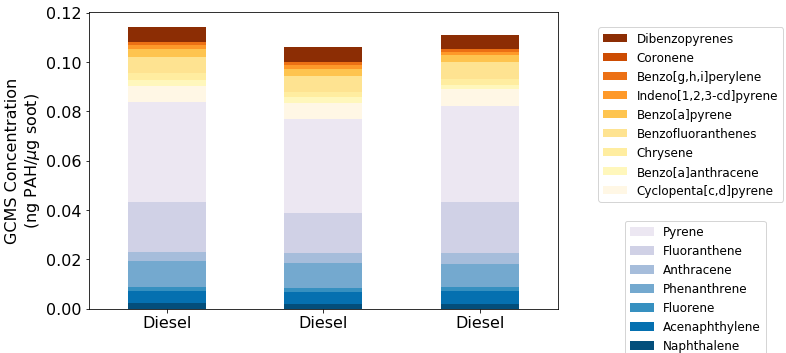

In [19]:
col = [(3,78,123),
(5,112,176),
(54,144,192),
(116,169,207),
(166,189,219),
(208,209,230),
(236,231,242),
       
(255,247,229),
(255,247,188),
(255,237,160),
(254,227,145),
(254,196,79),
(254,153,41),
(236,112,20),
(204,76,2),
(140,45,4)]

col = np.divide(col,255);

lst = []
for colmn in y_diesel.columns:
    lst.append(colmn[0:len(colmn)-17])

f1 = plt.figure(figsize=(8,4.8))
ax1 = f1.add_subplot(1,1,1)
y_diesel.plot(kind='bar', stacked=True, color=col,ax=ax1)
# ax1.set_title('Diesel',fontsize=16)
ax1.set_ylabel('GCMS Concentration\n(ng PAH/$\mu$g soot)',fontsize=16)
# ax1.set_xlabel('Sample Type')
ax1.set_xticklabels(diesel_labels.to_list(), rotation=0)
ax1.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
lgd = f1.legend(reversed(handles[:7]), reversed(lst[:7]), loc=1,bbox_to_anchor=(1.34, 0.4),prop={'size': 12})
lgd = f1.legend(reversed(handles[7:]), reversed(lst[7:]), loc=4,bbox_to_anchor=(1.37, 0.42),prop={'size': 12})
plt.tight_layout()
f1.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\DieselGCMS.png', bbox_inches='tight')


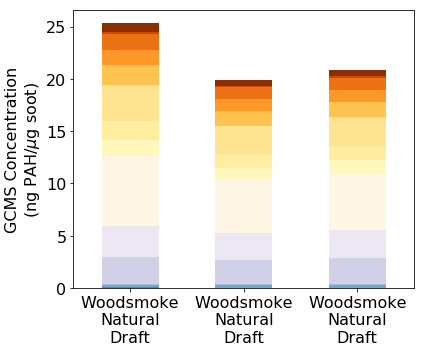

In [28]:
col = [(3,78,123),
(5,112,176),
(54,144,192),
(116,169,207),
(166,189,219),
(208,209,230),
(236,231,242),
       
(255,247,229),
(255,247,188),
(255,237,160),
(254,227,145),
(254,196,79),
(254,153,41),
(236,112,20),
(204,76,2),
(140,45,4)]

col = np.divide(col,255);

lst = []
for colmn in y_woodsmoke.columns:
    lst.append(colmn[0:len(colmn)-17])
    
labels = [\
#           'Woodsmoke\nForced\nDraft','Woodsmoke\nForced\nDraft','Woodsmoke\nForced\nDraft',\
         'Woodsmoke\nNatural\nDraft','Woodsmoke\nNatural\nDraft','Woodsmoke\nNatural\nDraft'
         ]

f1 = plt.figure(figsize=(6,5))
ax1 = f1.add_subplot(1,1,1)
y_woodsmoke[3:].plot(kind='bar', stacked=True, color=col,ax=ax1)
# ax1.set_title('Woodsmoke', fontsize=16)
ax1.set_ylabel('GCMS Concentration\n(ng PAH/$\mu$g soot)',fontsize=16)
# ax1.set_xlabel('Sample Type',fontsize=16)
ax1.set_xticklabels(labels, rotation=0,fontsize=16)
ax1.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)
# lgd = f1.legend(reversed(handles[:7]), reversed(lst[:7]), loc=1,bbox_to_anchor=(1.2, 0.4),prop={'size': 12})
# lgd = f1.legend(reversed(handles[7:]), reversed(lst[7:]), loc=4,bbox_to_anchor=(1.22, 0.42),prop={'size': 12})
plt.tight_layout()
f1.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\Woodsmoke_Natural_GCMS.png', bbox_inches='tight')


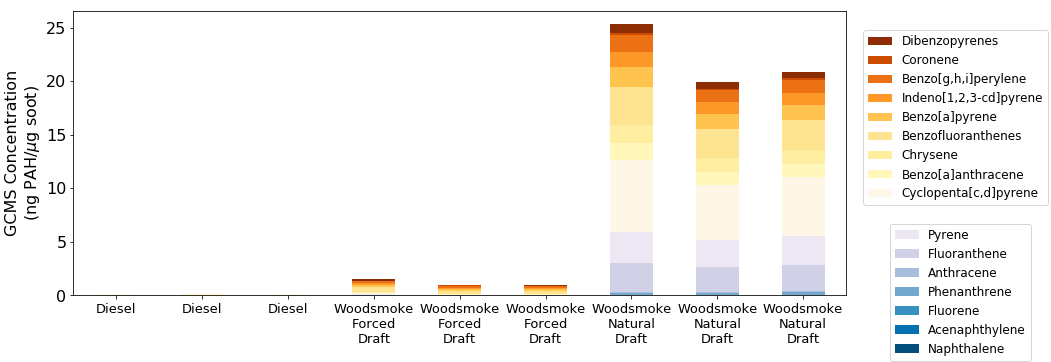

In [21]:
col = [(3,78,123),
(5,112,176),
(54,144,192),
(116,169,207),
(166,189,219),
(208,209,230),
(236,231,242),
       
(255,247,229),
(255,247,188),
(255,237,160),
(254,227,145),
(254,196,79),
(254,153,41),
(236,112,20),
(204,76,2),
(140,45,4)]

col = np.divide(col,255);

labels = ['Diesel','Diesel','Diesel', \
         'Woodsmoke\nForced\nDraft','Woodsmoke\nForced\nDraft','Woodsmoke\nForced\nDraft',\
         'Woodsmoke\nNatural\nDraft','Woodsmoke\nNatural\nDraft','Woodsmoke\nNatural\nDraft']

lst = []
for colmn in y_woodsmoke.columns:
    lst.append(colmn[0:len(colmn)-17])

f1 = plt.figure(figsize=(12,5))
ax1 = f1.add_subplot(1,1,1)
y_ws_d.plot(kind='bar', stacked=True, color=col,ax=ax1)
# ax1.set_title('Woodsmoke', fontsize=16)
ax1.set_ylabel('GCMS Concentration\n(ng PAH/$\mu$g soot)',fontsize=16)
# ax1.set_xlabel('Sample Type',fontsize=16)
ax1.set_xticklabels(labels,  rotation=0,fontsize=16)
ax1.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
ax1.tick_params(axis='x', labelsize=13)
ax1.tick_params(axis='y', labelsize=16)
lgd = f1.legend(reversed(handles[:7]), reversed(lst[:7]), loc=1,bbox_to_anchor=(1.2, 0.4),prop={'size': 12})
lgd = f1.legend(reversed(handles[7:]), reversed(lst[7:]), loc=4,bbox_to_anchor=(1.22, 0.42),prop={'size': 12})
plt.tight_layout()
f1.savefig('C:\\Users\\IVN\\Dropbox\\Final Examination\\Figures\\Diesel Woodsmoke PCR-EEM Test\\WoodsmokeDieselGCMS.png', bbox_inches='tight')


[Text(0, 0, '0.64'),
 Text(0, 0, '0.73'),
 Text(0, 0, '0.73'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.67'),
 Text(0, 0, '0.0'),
 Text(0, 0, '0.64')]

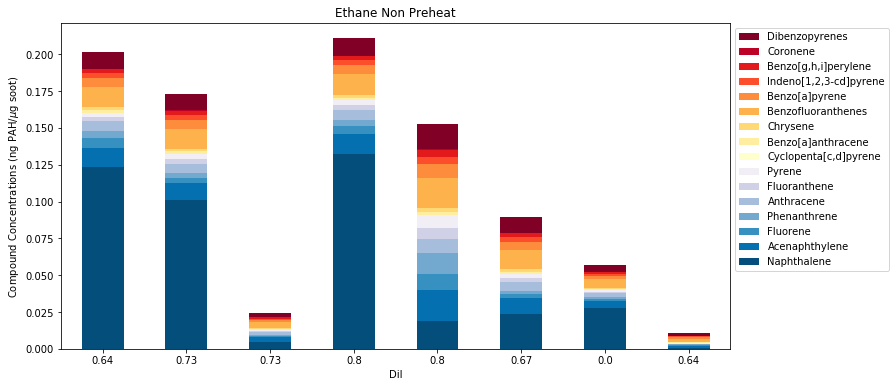

In [22]:
col = [(3,78,123),
(5,112,176),
(54,144,192),
(116,169,207),
(166,189,219),
(208,209,230),
(241,238,246),

(255,255,204),
(255,237,160),
(254,217,118),
(254,178,76),
(253,141,60),
(252,78,42),
(227,26,28),
(189,0,38),
(128,0,38)]

col = np.divide(col,255);

lst = []
for colmn in y_ethane_amb.columns:
    lst.append(colmn[0:len(colmn)-17])

f1 = plt.figure(figsize=(12,6))
ax1 = f1.add_subplot(1,1,1)
y_ethane_amb.plot(kind='bar', stacked=True, color=col,ax=ax1)
ax1.set_title('Ethane Non Preheat')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(lst), loc='upper left',bbox_to_anchor=(1, 1))
ax1.set_ylabel('Compound Concentrations (ng PAH/$\mu$g soot)')
ax1.set_xlabel('Dil')
ax1.set_xticklabels(ethane_labels_amb, rotation=0)

[Text(0, 0, '0.8'), Text(0, 0, '0.67'), Text(0, 0, '0.0')]

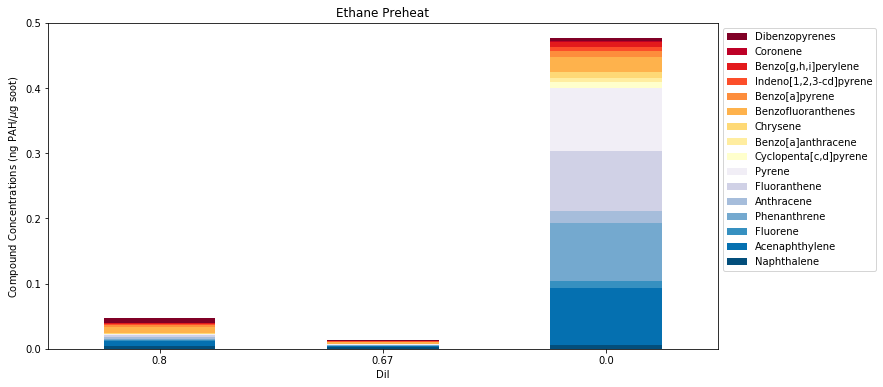

In [23]:
col = [(3,78,123),
(5,112,176),
(54,144,192),
(116,169,207),
(166,189,219),
(208,209,230),
(241,238,246),

(255,255,204),
(255,237,160),
(254,217,118),
(254,178,76),
(253,141,60),
(252,78,42),
(227,26,28),
(189,0,38),
(128,0,38)]

col = np.divide(col,255);

lst = []
for colmn in y_ethane_ph.columns:
    lst.append(colmn[0:len(colmn)-17])

f1 = plt.figure(figsize=(12,6))
ax1 = f1.add_subplot(1,1,1)
y_ethane_ph.plot(kind='bar', stacked=True, color=col,ax=ax1)
ax1.set_title('Ethane Preheat')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(lst), loc='upper left',bbox_to_anchor=(1, 1))
ax1.set_ylabel('Compound Concentrations (ng PAH/$\mu$g soot)')
ax1.set_xlabel('Dil')
ax1.set_xticklabels(ethane_labels_ph, rotation=0)

[Text(0, 0, 'Ethylene'), Text(0, 0, 'Reactor Sediment')]

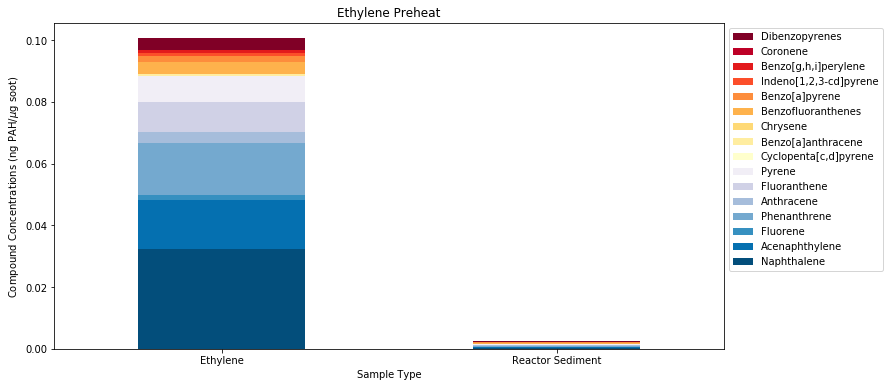

In [24]:
col = [(3,78,123),
(5,112,176),
(54,144,192),
(116,169,207),
(166,189,219),
(208,209,230),
(241,238,246),

(255,255,204),
(255,237,160),
(254,217,118),
(254,178,76),
(253,141,60),
(252,78,42),
(227,26,28),
(189,0,38),
(128,0,38)]

col = np.divide(col,255);

lst = []
for colmn in y_ethylene.columns:
    lst.append(colmn[0:len(colmn)-17])

f1 = plt.figure(figsize=(12,6))
ax1 = f1.add_subplot(1,1,1)
y_ethylene.plot(kind='bar', stacked=True, color=col,ax=ax1)
ax1.set_title('Ethylene Preheat')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(lst), loc='upper left',bbox_to_anchor=(1, 1))
ax1.set_ylabel('Compound Concentrations (ng PAH/$\mu$g soot)')
ax1.set_xlabel('Sample Type')
ax1.set_xticklabels(ethylene_labels, rotation=0)